# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [85]:
#imports
from __future__ import division
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [81]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [67]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: admit 400, gre 398, gpa 398, prestige 399

#### Question 2. Create a summary table

In [68]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: because they have different scale/basis. GRE score spreads like 220 to 800 but GPA is 2.26 to 4

#### Question 4. Drop data points with missing data


In [69]:
df_raw_nadropped = df_raw.dropna()

In [70]:
#DataFrame(df_raw_nadropped).describe()
df_raw_nadropped.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: dont quite understand the question but percentiles being calclated with one with dropping missing data?

#### Question 6. Create box plots for GRE and GPA

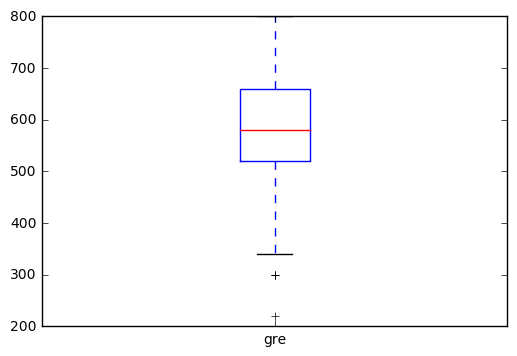

In [91]:
#boxplot 1 box plot for gre
df_raw[['gre']].plot(kind='box');

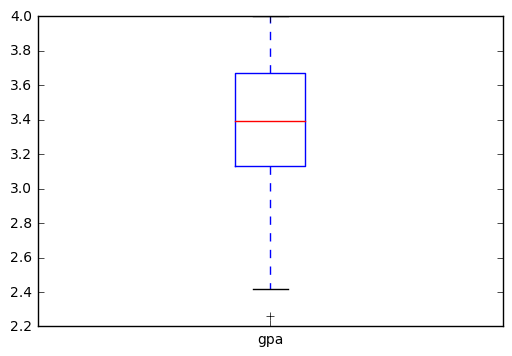

In [92]:
#boxplot 2 box plot for gpa
df_raw[['gpa']].plot(kind='box');

#### Question 7. What do this plots show?

Answer: min/max range, median, and outliers

#### Question 8. Describe each distribution 

In [93]:
df_raw.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bee6a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c2a7750>]], dtype=object)

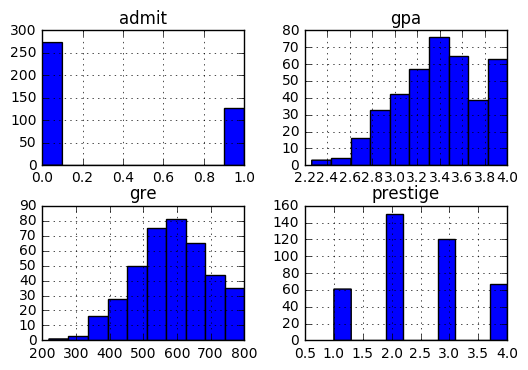

In [20]:
# plot the distribution of each variable 
#df_raw['gre'].plot.hist()
df_raw.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: since outcome, admit, is a binary variable so it will not meet the assumption of a normal distribution, follow logit dist 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: since this follows logistic distribution so we have to take natural log of the outcome val to get probability distribution. 

#### Question 11. Which of our variables are potentially colinear? 

In [39]:
pd.crosstab(df_raw['admit'],df_raw['prestige'],rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,97,93,55
1,33,53,28,12


In [97]:
# create a correlation matrix for the data
df_raw.corr()

# looks like admit correlates, at least has a linear relationships, to all
#other predictor variables. but we need to investigate further on prestige val since
#this is another binary val taking 1~4 values

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


In [95]:
#create dummy ranks
dummy_ranks = pd.get_dummies(df_raw['prestige'],prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0           0.0           0.0           1.0           0.0
1           0.0           0.0           1.0           0.0
2           1.0           0.0           0.0           0.0
3           0.0           0.0           0.0           1.0
4           0.0           0.0           0.0           1.0


In [83]:
# create crean data frame for the regression
cols_to_keep = ['admit','gre','gpa']
data = df_raw[cols_to_keep].join(dummy_ranks.ix[:,'prestige_2':])
print data.head()

#intercept
data['intercept'] = 1.0

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0


In [101]:
predictor_cols = data.columns[1:]

logit = sm.Logit(data['admit'], data[predictor_cols])

result = logit.fit()

# couldnt run it. below questions were answered based on what i saw on yhat site. 

ValueError: On entry to DLASCL parameter number 5 had an illegal value

In [99]:
print result.summary()

NameError: name 'result' is not defined

#### Question 12. What did you find?

Answer: gre has slightly positive relationhips with admit. gpa also has positive relationships to admit. and there is negative relationships between admit and prestige, the lower the rank(better school), the higher the possibility of admit. p-values are all significant at 95% confidece level, less than 0.05.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: it seems to be negatively correlated, the lower the rank( better sshool), the higher the admit.  we can take the exponential of coefficients to generate odds ratio. this tells you how one unit increase/decrease in a variable affects the odds of being admitted. then we can interpret the coeffcients to make sure whether they are negatively correlated to admit. 

In [100]:
#odds ratio
print np.exp(result.params)

NameError: name 'result' is not defined

In [102]:
! pwd

/Users/kazuhirokimura/ds-homework/starter-code


#### Question 14. What is your hypothesis? 

Answer: null hypothesis could be that there is no association between any of presitige variables and admission. b1 = b2 = b3 = 0 (null hypothesis)

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data